#### Ali K. Thabet

#### Overview:

The aim of this project is to implement the ideas in Machine Learning related to model evaluation and validation. It is Project 1 in the Machine Learning Engineer Nanodegree. More specifically, we will use data related to housing prices in Boston in order to predict the best house price for a sample house. 

#### Import Statements:

In [3]:
# Load libraries
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

################################
### ADD EXTRA LIBRARIES HERE ###
################################
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn import grid_search

%matplotlib inline

#### Load the Boston Housing data

In [4]:
def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()
    return boston

#### Compute and display some descriptive measures and statistics

In [5]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data
    # Feature descriptions taken from the boston dataset DESCR variable
    feature_desc = ["Per capita crime rate by town",
                    "Proportion of residential land zoned for lots over 25,000 sq.ft.",
                    "Proportion of non-retail business acres per town",
                    "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
                    "Nitric oxides concentration (parts per 10 million)",
                    "Average number of rooms per dwelling",
                    "Proportion of owner-occupied units built prior to 1940",
                    "Weighted distances to five Boston employment centres",
                    "Index of accessibility to radial highways",
                    "Full-value property-tax rate per $10,000",
                    "Pupil-teacher ratio by town",
                    "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
                    "% lower status of the population"]
    feature_means = np.mean(housing_features, axis=0)
    feature_stds = np.std(housing_features, axis=0)
    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################
    
    #Feature parameters
    print "Feature Parameters: Mean - STD"
    print ""
    for i, s in enumerate(feature_desc):
        print s,"=", "%.2f" % feature_means[i], "%.2f" % feature_stds[i]
    print ""
    
    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    print "Data parameters:"
    print ""
    print "Number of data points (houses) =", len(housing_prices)
    # Number of features?
    print "Number of features =", len(housing_features[0])
    # Minimum price?
    print "Minimum house price =", np.min(housing_prices)
    # Maximum price?
    print "Maximum house price =", np.max(housing_prices)
    # Calculate mean price?
    print "Mean house price =", "%.2f" % np.mean(housing_prices)
    # Calculate median price?
    print "Median house price =", np.median(housing_prices)
    # Calculate standard deviation?
    print "Standard deviation of house prices =", "%.2f" % np.std(housing_prices)

#### Display Features


We can see the relation of each future to housing prices by plotting them separately. We observe some obvious behaviour like the increase in house prices as number of rooms increase, and the decrease of house prices as crime rate increases. With a small number of features like in the given case, one can look at these graphs in order to get a better understanding of the data. With larger feature dimensionality, visualization becomes more challenging.

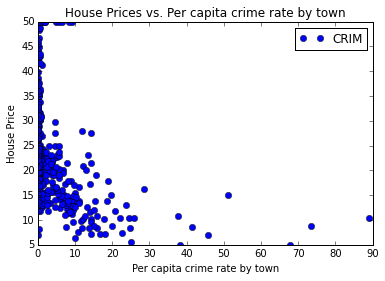

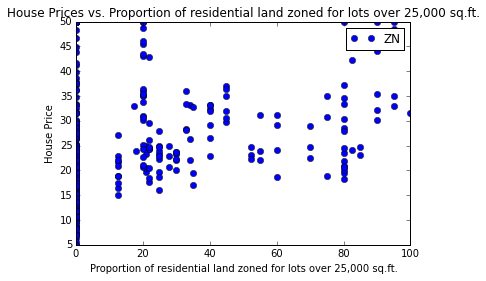

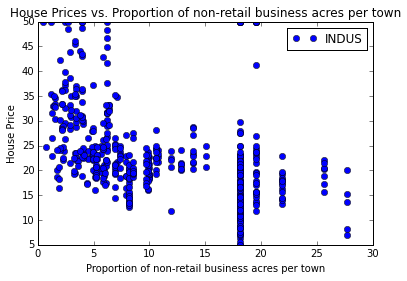

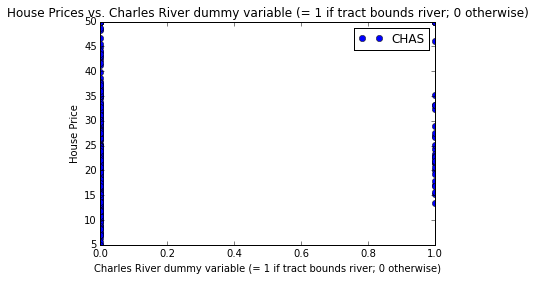

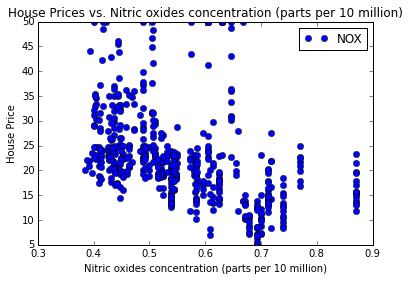

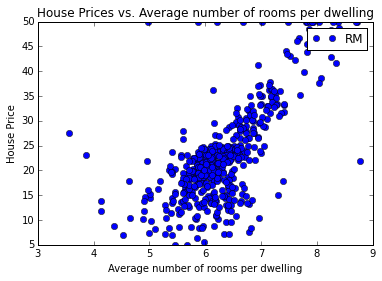

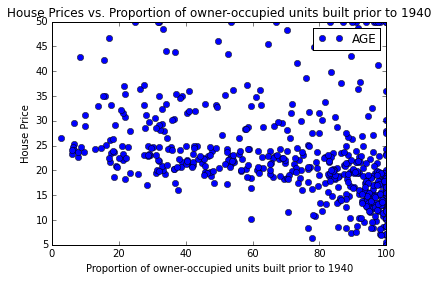

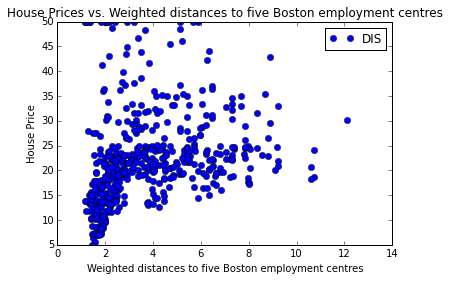

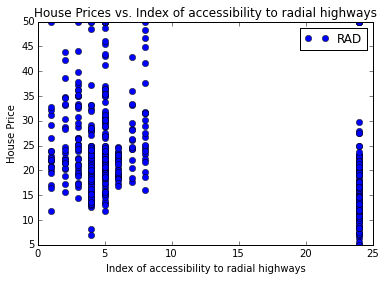

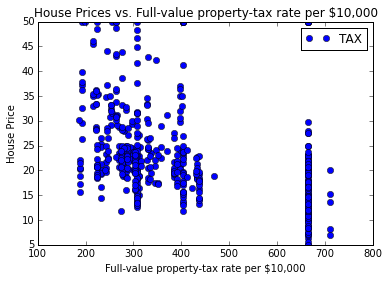

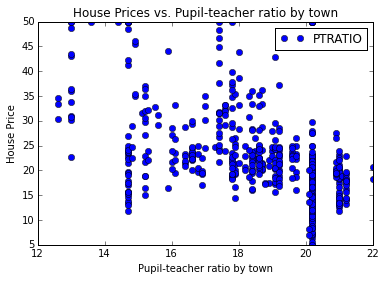

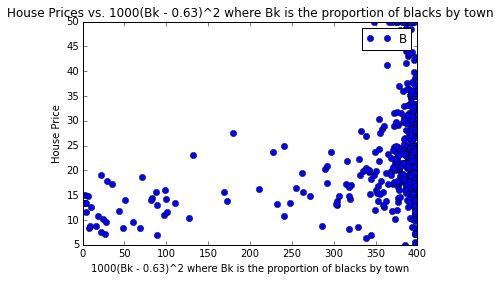

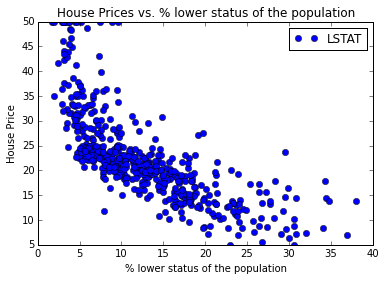

In [28]:
# Testing

city_data = load_data()

housing_prices = city_data.target
housing_features = city_data.data
feature_names = city_data.feature_names
feature_desc = ["Per capita crime rate by town",
                "Proportion of residential land zoned for lots over 25,000 sq.ft.",
                "Proportion of non-retail business acres per town",
                "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
                "Nitric oxides concentration (parts per 10 million)",
                "Average number of rooms per dwelling",
                "Proportion of owner-occupied units built prior to 1940",
                "Weighted distances to five Boston employment centres",
                "Index of accessibility to radial highways",
                "Full-value property-tax rate per $10,000",
                "Pupil-teacher ratio by town",
                "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
                "% lower status of the population"]

for i in range(len(feature_names)):
    pl.figure()
    pl.title("House Prices vs. " + feature_desc[i])
    pl.plot(housing_features[:,i], housing_prices, 'bo', label=feature_names[i])
    pl.legend()
    pl.xlabel(feature_desc[i])
    pl.ylabel('House Price')
    #pl.ylim(0,60)
    pl.show()

#### Split the data for crossvalidation

In [7]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.7)

    return X_train, y_train, X_test, y_test

#### Performance metric:
We are estimating housing prices using regression. Scikit-learn provides different options for performing regression evaluation. These are summarized at http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics. The metric of choice is R2 score, which is the coefficient of determination.

In [8]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    return r2_score(label, prediction)

#### Learning and Model Complexity Curves

In [9]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""
        
    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)

In [23]:
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.ylim([-0.4, 1.2])
    pl.show()

In [11]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [25]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.ylim([0.0, 1.2])
    pl.show()

#### Prediction Model:

This is the prediction estimated using a decision tree regressor. We add the Grid Search capabilities in order to estimate the best value for the tree maximum depth.

In [13]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    r2_scorer = make_scorer(performance_metric)
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=r2_scorer)

    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y)
    print reg.best_params_
    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)

In [14]:
#### Estimating Boston House Prices

In [15]:
"""Analyze the Boston housing data. Evaluate and validate the
   performanance of a Decision Tree regressor on the housing data.
   Fine tune the model to make prediction on unseen data."""

# Load data
city_data = load_data()

#### Questions:
####  Statistical Analysis and Data Exploration
* Number of data points (houses)?
* Number of features?
* Minimum and maximum housing prices?
* Mean and median Boston housing prices?
* Standard deviation?

In [16]:
# Explore the data
explore_city_data(city_data)

Feature Parameters: Mean - STD

Per capita crime rate by town = 3.59 8.59
Proportion of residential land zoned for lots over 25,000 sq.ft. = 11.36 23.30
Proportion of non-retail business acres per town = 11.14 6.85
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) = 0.07 0.25
Nitric oxides concentration (parts per 10 million) = 0.55 0.12
Average number of rooms per dwelling = 6.28 0.70
Proportion of owner-occupied units built prior to 1940 = 68.57 28.12
Weighted distances to five Boston employment centres = 3.80 2.10
Index of accessibility to radial highways = 9.55 8.70
Full-value property-tax rate per $10,000 = 408.24 168.37
Pupil-teacher ratio by town = 18.46 2.16
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town = 356.67 91.20
% lower status of the population = 12.65 7.13

Data parameters:

Number of data points (houses) = 506
Number of features = 13
Minimum house price = 5.0
Maximum house price = 50.0
Mean house price = 22.53
Median house price = 21

####  Evaluating Model Performance
* **Which measure of model performance is best to use for predicting Boston housing data and analysing the errors? Why do you think this measurement most appropriate? Why might the other measurements not be appropriate here?:** 
    
    We first observe that the estimation of Boston housing prices is done via a regression, therefore we need to choose a metric that is compatible with regression and not classification problems. If we read the Scikit-Learn documentation on [Regression Metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics), we see that there are four possible metrics to choose from, mean absolute error, mean squared error, median absolute error, and R2 score. Here is a brief description of each metric:
    
    1- Mean Absolute Error: This metric computes the expected value of the l1-norm loss, or the mean of the absolute value of the difference between the true and estimated values. The disadvantage of using such metric is that errors are penalized at the same rate, regardless of the distance of the actual points to the estimated line. This means that for different lines having the same points on each side, the mean absolute error of all these lines would be the same; intuitively we would want the line that best centers in between the data. This line will be more robust to prediction errors when we start testing with points we have not seen before. 
    
    2- Median Absolute Error: This metric is similar to the Mean Absolute Error, but it instead computes the median of absolute values instead of the mean. The motivation behind it is that a median is robust to outliers. This metric however suffers from the same disadvantages as the previous one.
    
    3- Mean Squared Error: The Mean Squared Error metric overcomes the disadvantages of the Mean and Median Absolute Error metrics. The Mean Squared Error computed the average of the squared differences between the true and estimated points. In practice, this means that as the difference between two values increases, their mean squared error grows at a higher rate. This growth will make sure that the regression favors a line where the training points are more evenly distributed around it in terms of distance. This property basically solves the issue presented by the absolute error metrics. One major disadvantage of the Mean Squared Error (and in fact of both absolute error metrics too) is that the error depends on the number of training points available. This means that as we add more points to our training set, the error will keep on increasing. We would be better off with a metric that is independent of training size.
    
    4- R2 Score: The R2 Score is a measure that is independent of training size. This score predicts how much of the training data is explained by the predicted model. A score of 1.0 states that our model would predict 100% of any samples correctly. A score of 0.0 means that our model predicts output values without considering the training input.

	Based ont he information above it is not difficult to see that the best metric to use in this problem is the R2 Score.
    
    
* **Why is it important to split the Boston housing data into training and testing data? What happens if you do not do this?**

    Doing the split helps us in two major ways. First, it serves as a good estimate of the possible performance of our algorithm. By having a test set, we can apply our algorithm and measure how well it performs. Second, a testing set will help us prevent overfitting. If we do not split the data into a training and testing set, we could easily reach a point where we tune the model parameters so specifically that it will only work on the training data and give high errors of the actual predictions.
    
    
* **What does grid search do and why might you want to use it?**

    Grid search is a way to tune the parameters of our model. We use grid search by providing a set of possible values for each parameter that we would like to tune, and send these parameters to the grid search algorithm. The algorithm then automatically runs the classifier or regression model using each of these parameters and then selects the best ones given a certain performance metric.
    
    
* **Why is cross validation useful and why might we use it with grid search?**

    Cross validation provides a way to maximize the use of our training and testing data. Since we split the data into multiple sets, we can run several experiments instead of just one and average our performance over all those experiments. This is particularly useful in grid search, where for every tuning combination we get, we run a full cross validation using that parameter set, and compare the performance of all set combinations in order to choose the best tuning parameters for our model. 

In [17]:
# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

#### Analyzing Model Performance
* **Look at all learning curve graphs provided. What is the general trend of training and testing error as training size increases?**

    We see that for the testing set, the error decreases as we add more points. In the case of the training set, for the first few graphs, the error increases as we add more points, this makes sense since with few points the model is overfitting and cannot describe other data well, but as more points are added the training error increases but the testing error decreases.


* **Look at the learning curves for the decision tree regressor with max depth 1 and 10 (first and last learning curve graphs). When the model is fully trained does it suffer from either high bias/underfitting or high variance/overfitting?**

    With max depth 1, the model suffers from some bias. The training and testing set convergence to the same error, but this error is still high (R2 score of around 0.4). In the case of max depth 10, the gap between training and testing error is high, suggesting overfitting. In fact, the training R2 score is 1.0 suggesting that the model is 100% accurate, while the testing set shows some error (R2 score of around 0.8). This is typical overfitting behavior.


* **Look at the model complexity graph. How do the training and test error relate to increasing model complexity? Based on this relationship, which model (max depth) best generalizes the dataset and why?**

    As the complexity of the model increases, both the training and testing error decrease, however, at a certain point, the gap between training and testing error becomes quite large, reaching the point where training error becomes zero. We would choose a model complexity that minimizes the testing error. By looking at the graph, we see several options to choose from, however, based on Occam's Razor, we would choose the smallest complexity that would give us satisfactory results, which would be max depth of around 4 or 5.

Decision Tree with Max Depth: 
1


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


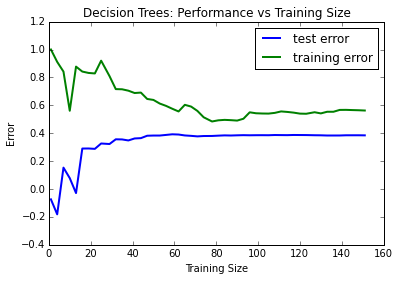

Decision Tree with Max Depth: 
2


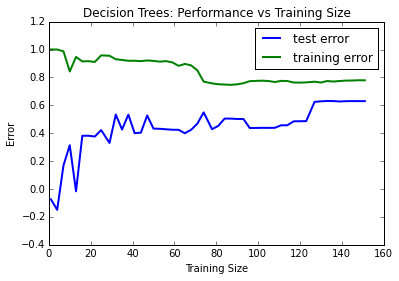

Decision Tree with Max Depth: 
3


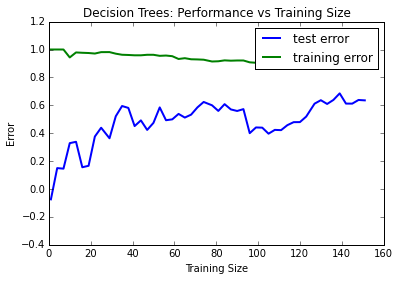

Decision Tree with Max Depth: 
4


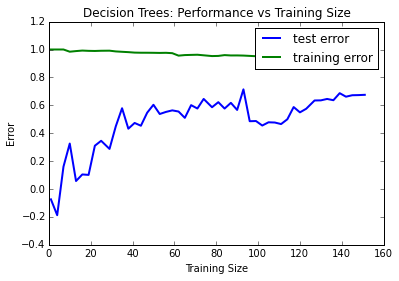

Decision Tree with Max Depth: 
5


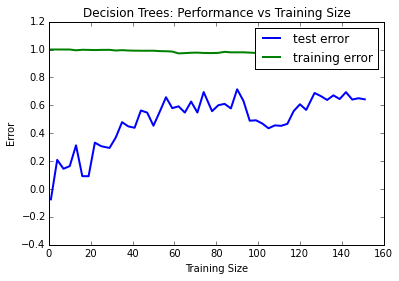

Decision Tree with Max Depth: 
6


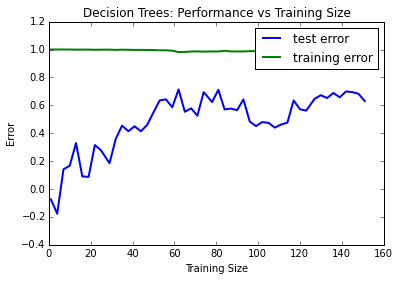

Decision Tree with Max Depth: 
7


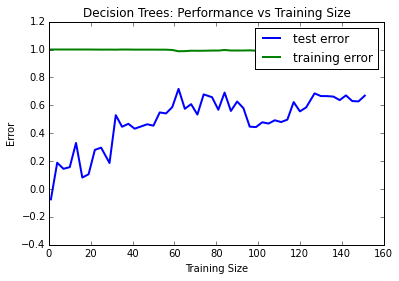

Decision Tree with Max Depth: 
8


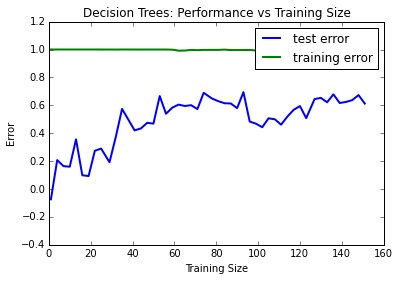

Decision Tree with Max Depth: 
9


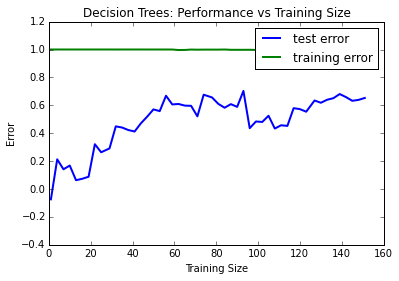

Decision Tree with Max Depth: 
10


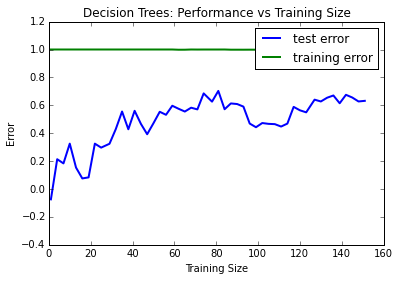

Model Complexity: 


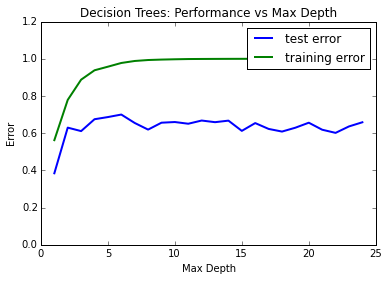

In [26]:
# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

#### Model Prediction
* **Model makes predicted housing price with detailed model parameters (max depth) reported using grid search. Note due to the small randomization of the code it is recommended to run the program several times to identify the most common/reasonable price/model complexity.**

    Running the model gives us the following results: Ideal max depth from cross validation is 4, predicted house price is 21.62. 
    
    
* **Compare prediction to earlier statistics and make a case if you think it is a valid model.**

    Our statistics show that the mean house price is 22 with a standard deviation of 10. Our estimated price falls within these bounds so it is likely to be valid. We could also use the visualizations of features vs price to see if our features make sense with the estimated price. Such analysis shows that for the most part, each feature aligns with the estimated price. 

In [22]:
# Tune and predict Model
fit_predict_model(city_data)

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(performance_metric), verbose=0)
{'max_depth': 4}
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 21.62974359]
